# Image Classifier Project

The dataset is comprised of photos of dogs and cats provided as a subset of photos from a much larger dataset of 3 million manually annotated photos. The dataset was developed as a partnership between Petfinder.com and Microsoft.

The dataset was originally used as a CAPTCHA, that is, a task that it is believed a human finds trivial, but cannot be solved by a machine, used on websites to distinguish between human users and bots. The task was referred to as "Asirra". When "Asirra" was presented, it was mentioned 'that user studies indicate it can be solved by humans 99.6% of the time in under 30 seconds. Barring a major advance in machine vision, we expect computers will have no better than a 1/54,000 chance of solving it'.

At the time that the competition was posted, the state-of-the-art result was achieved with an SVM and described in a 2007 paper with the title “Machine Learning Attacks Against the Asirra CAPTCHA” (PDF) that achieved 80% classification accuracy. It was this paper that demonstrated that the task was no longer a suitable task for a CAPTCHA soon after the task was proposed.

The dataset is straightforward to understand and small enough to fit into memory and get started with computer vision and convolutional neural networks.

**Step 1:**
Download the datatset folder and unzip files

**Step 2:** Import libraries

In [2]:
import keras,os
from keras.models import Sequential  #As all the layers of the model will be arranged in sequence
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator #As it imports data with labels easily into the model. It has functions to rescale, rotate, zoom, etc. This class alters the data on the go while passing it to the model.
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib import pyplot
from matplotlib.image import imread

**Step 3:**

Create an object of ImageDataGenerator for both training and testing data and pass the folder which has train data to the object trdata and similarly pass the folder which has test data to the object tsdata.

In [2]:
trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory="../data/raw",target_size=(224,224))
tsdata = ImageDataGenerator()
testdata = tsdata.flow_from_directory(directory="../data/raw", target_size=(224,224))

Found 37500 images belonging to 2 classes.
Found 37500 images belonging to 2 classes.


**Step 4:**

Load and plot the first nine photos of dogs in a single figure. Repeat the same for cats. 
</br> Load the images progressively using the Keras ImageDataGenerator class and flow_from_directory() API.

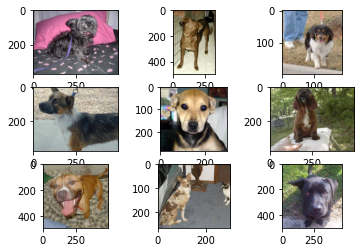

In [3]:
#Define location of dataset
folder = '../data/raw/train/'
#Plot first few images
for i in range(9):
	#Define subplot
	pyplot.subplot(330 + 1 + i)
	#Define filename
	filename = folder + 'dog.' + str(i) + '.jpg'
	#Load image pixels
	image = imread(filename)
	#Plot raw pixel data
	pyplot.imshow(image)
	
pyplot.show()

**Step 5:**

Initialize the model by specifying that the model is a sequential model. 

In [4]:
model = Sequential()

After initialising the model add:

→ 2 x convolution layer of 64 channel of 3x3 kernal and same padding

In [5]:
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))

→ 1 x maxpool layer of 2x2 pool size and stride 2x2

In [6]:
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

→ 3 x convolution layer of 256 channel of 3x3 kernal and same padding

In [7]:
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))

→ 1 x maxpool layer of 2x2 pool size and stride 2x2

In [8]:
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

→ 3 x convolution layer of 512 channel of 3x3 kernal and same padding

In [9]:
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))

→ 1 x maxpool layer of 2x2 pool size and stride 2x2

In [10]:
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

→ 3 x convolution layer of 512 channel of 3x3 kernal and same padding

In [11]:
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))

→ 1 x maxpool layer of 2x2 pool size and stride 2x2

In [12]:
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

**Step 6:**

After creating all the convolution, pass the data to the dense layer. In order to do that, you should first flatten the vector which comes out of the convolutions and then add:

→ 1 x Dense layer of 4096 units

→ 1 x Dense layer of 4096 units

→ 1 x Dense Softmax layer of 2 units

Use RELU activation for both of the dense layers in order to stop forwarding negative values through the network. Use a 2 unit dense layer in the end with softmax activation as you have 2 classes to predict. The softmax layer will output the value between 0 and 1 based on the confidence of the model that which class the images belongs to.

In [13]:
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=2, activation="softmax"))

**Step 7:**

Import Adam optimizer and use it to compile the model. Specify a learning rate for it.

In [14]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss = keras.losses.categorical_crossentropy, metrics = ['accuracy'])

#Source: https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam
#https://keras.io/api/losses/

**Step 8:**

Check the summary of the model

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 256)     147712    
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 256)     590080    
                                                                 
 conv2d_4 (Conv2D)           (None, 112, 112, 256)     590080    
                                                        

**Step 9:**

Import ModelCheckpoint and EarlyStopping method from keras. Create an object of both and pass that as callback functions to fit_generator.

In [16]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("../models/model.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early_stop = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=20, verbose=1, mode='auto')
h = model.fit_generator(steps_per_epoch=20,generator=traindata, validation_data= testdata, validation_steps=10,epochs=20,callbacks=[checkpoint,early_stop])

C:\Users\belen\AppData\Local\Temp\ipykernel_22180\4042022268.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  h = model.fit_generator(steps_per_epoch=20,generator=traindata, validation_data= testdata, validation_steps=10,epochs=20,callbacks=[checkpoint,early_stop])


Epoch 1/20
20/20 [==============================] - ETA: 0s - loss: 1305.0029 - accuracy: 0.5641 
Epoch 1: val_accuracy improved from -inf to 0.67500, saving model to ../models\model.h5
20/20 [==============================] - 1298s 66s/step - loss: 1305.0029 - accuracy: 0.5641 - val_loss: 0.6379 - val_accuracy: 0.6750
Epoch 2/20
20/20 [==============================] - ETA: 0s - loss: 0.6562 - accuracy: 0.6328 
Epoch 2: val_accuracy did not improve from 0.67500
20/20 [==============================] - 1140s 57s/step - loss: 0.6562 - accuracy: 0.6328 - val_loss: 0.6474 - val_accuracy: 0.6625
Epoch 3/20
20/20 [==============================] - ETA: 0s - loss: 0.6374 - accuracy: 0.6891 
Epoch 3: val_accuracy did not improve from 0.67500
20/20 [==============================] - 1114s 56s/step - loss: 0.6374 - accuracy: 0.6891 - val_loss: 0.6383 - val_accuracy: 0.6656
Epoch 4/20
20/20 [==============================] - ETA: 0s - loss: 0.6436 - accuracy: 0.6750 
Epoch 4: val_accuracy improv

**Step 10:**

Once you have trained the model, visualise training/validation accuracy and loss.

In [ ]:
plt.plot(h.history["acc"])
plt.plot(h.history['val_accuracy'])
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

#Este chunk no lo puedo correr porque en el chunk anterior se me tranca la computadora entonces en este paso no tengo definido 'h'

**Step 11:**

Load the best saved model and pre-process the image, then pass the image to the model and make predictions.

1/1 [==============================] - 7s 7s/step
dog


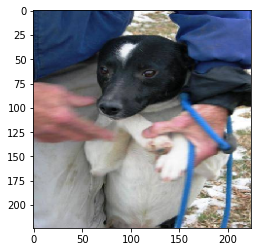

In [14]:
from keras.preprocessing import image
img = tf.keras.utils.load_img("../data/raw/test1/1.jpg",target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)
from keras.models import load_model
saved_model = load_model("../models/model.h5")
output = saved_model.predict(img)
if output[0][0] > output[0][1]:
    print("cat")
else:
    print('dog')

#Predice perro como perro, está bien